# Desenvolvimento do Modelo

Nesta seção, desenvolveremos vários modelos que preverão o preço do carro usando as variáveis ou características. Isso é apenas uma estimativa, mas deve nos dar uma ideia objetiva de quanto o carro deveria custar.

Algumas perguntas que queremos fazer:

<ul>
    <li>Eu sei se a concessionária está oferecendo um valor justo para o meu carro usado?</li>
    <li>Eu sei se atribuí um valor justo ao meu carro?</li>
</ul>

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Este conjunto de dados estava hospedado no armazenamento de objetos da IBM Cloud. Clique <a href="https://cocl.us/DA101EN_object_storage">AQUI</a> para armazenamento gratuito.

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [3]:
try:
    df = pd.read_csv(path)
except FileNotFoundError:
    print("O arquivo não foi encontrado. Verifique o caminho e o nome do arquivo.")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [5]:
termos_traduzidos = [
    'classificação', 'perdas-normalizadas', 'fabricante', 'aspiraçao', 'num-de-portas',
    'estilo-de-carro', 'tracao', 'localizacao-do-motor', 'distancia-entre-eixos', 'comprimento',
    'largura', 'altura', 'peso-do-meio-fio', 'tipo-de-motor', 'num-de-cilindros',
    'tamanho-do-motor', 'sistema-de-combustível', 'diametro-do-cilindro', 'curso-do-pistao', 'taxa-de-compressao',
    'potencia', 'rpm-pico', 'consumo-na-cidade', 'consumo-na-estrada', 'preco',
    'consumo-na-cidade-L/100km', 'potencia-categorizada', 'diesel', 'gasolina'
]

In [6]:
df.columns = termos_traduzidos
df.head()

,classificação,perdas-normalizadas,fabricante,aspiraçao,num-de-portas,estilo-de-carro,tracao,localizacao-do-motor,distancia-entre-eixos,comprimento,...,taxa-de-compressao,potencia,rpm-pico,consumo-na-cidade,consumo-na-estrada,preco,consumo-na-cidade-L/100km,potencia-categorizada,diesel,gasolina
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Regressão Linear e Regressão Linear Múltipla</h2>





<b>Função Linear</b>
$$
Yhat = a + b  X
$$
<b>Nota:</b>

<li>Yhat representa a variável de resposta prevista.</li>
<li>a é onde intercepta a linha de regressão.</li>
<li>b é o coeficiente que multiplica a variável preditora X.</li>

Desejamos analisar como o consumo de estrada pode nos ajudar a prever o preço do carro. Usando regressão linear simples, criaremos uma função linear com o "consumo de estrada" como variável preditora e o "preço" como variável de resposta.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()
X = df[['consumo-na-estrada']]
Y = df['preco']
lm.fit(X,Y)


LinearRegression()

In [9]:
Yhat=lm.predict(X)
print('Nossas previsões: ', Yhat[0:5])   

Nossas previsões:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]


In [10]:
print('Ponto de interseção: ', lm.intercept_)

Ponto de interseção:  38423.3058581574


In [11]:
print('Coeficiente angular: ', lm.coef_)

Coeficiente angular:  [-821.73337832]


<h3>Modelo linear para consumo na estrada.</h3>


<b>Preço</b> = 38.423,31 - 821,73 x <b>consumo na estrada</b>

Agora fazeremos o mesmo para a relação do tamanho do motor e preço.

In [12]:
lm1 = LinearRegression()
X = df[['tamanho-do-motor']]
Y = df['preco']
lm1.fit(X,Y)


LinearRegression()

In [13]:
Yhat1=lm1.predict(X)
print('Nossas previsões: ', Yhat1[0:5])   

Nossas previsões:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408
 14729.62322775]


In [14]:
print('Ponto de interseção: ', lm1.intercept_)

Ponto de interseção:  -7963.338906281075


In [15]:
print('Coeficiente angular: ', lm1.coef_)

Coeficiente angular:  [166.86001569]


<h3>Modelo linear para o tamanho do motor</h3>


<b>Preço</b> = -1963,33 + 166,86 x <b>consumo na estrada</b>

<h2>Multipla regressão linear.</h2>


A equação é dada por:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p>Da seção anterior, sabemos que outros bons indicadores do preço podem ser:</p>

<ul>
    <li>Potência (potencia)</li>
    <li>Peso de meio-fio (peso-do-meio-fio)</li>
    <li>Tamanho do motor (tamanho-do-motor)</li>
    <li>Consumo de estrada (consumo-na-estrada)</li>
</ul>
Vamos desenvolver um modelo usando essas variáveis como as variáveis preditoras.

In [16]:
Z = df[['potencia', 'peso-do-meio-fio', 'tamanho-do-motor', 'consumo-na-estrada']]
lm.fit(Z, df['preco'])

LinearRegression()

In [17]:
print('Ponto de interseção: ', lm.intercept_)

Ponto de interseção:  -15806.624626329234


In [18]:
print('Coeficiente angular: ', lm.coef_)

Coeficiente angular:  [53.49574423  4.70770099 81.53026382 36.05748882]


<b>Preco</b> = -15678.742628061467 + 53.49574423 x <b>potencia</b> + 4.70770099 x <b>peso-do-meio-fio</b> + 81.53026382 x <b>tamanho-do-motor</b> + 36.05748882 x <b>consumo-na-estrada</b>


<h2>2. Avaliação do Modelo Usando Visualização</h2>

In [20]:
import seaborn as sns
%matplotlib inline 


Vamos visualizar **consumo de estrada** como uma possível variável preditora do preço:

(0.0, 48195.14961264537)

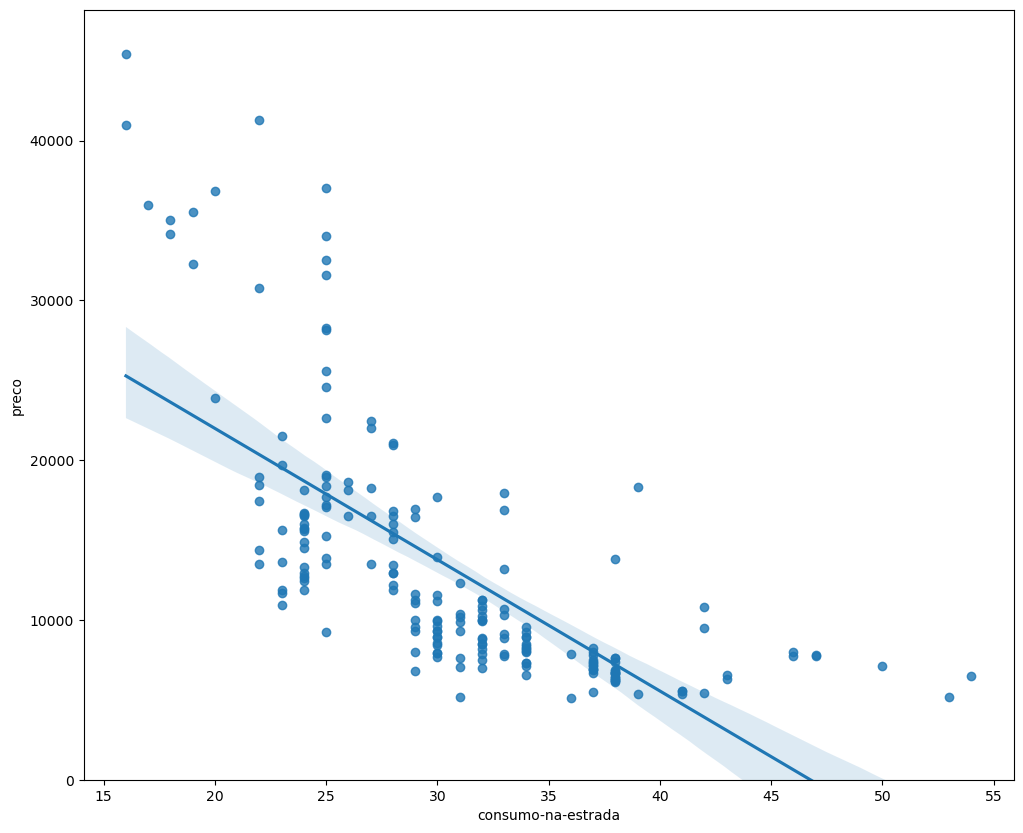

In [22]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="consumo-na-estrada", y="preco", data=df)
plt.ylim(0,)

Podemos ver a partir deste gráfico que o preço tem uma correlação negativa com o consumo de estrada.

Vamos comparar este gráfico com o gráfico de regressão de "rotação máxima do motor (rpm-pico)".

(0.0, 47414.1)

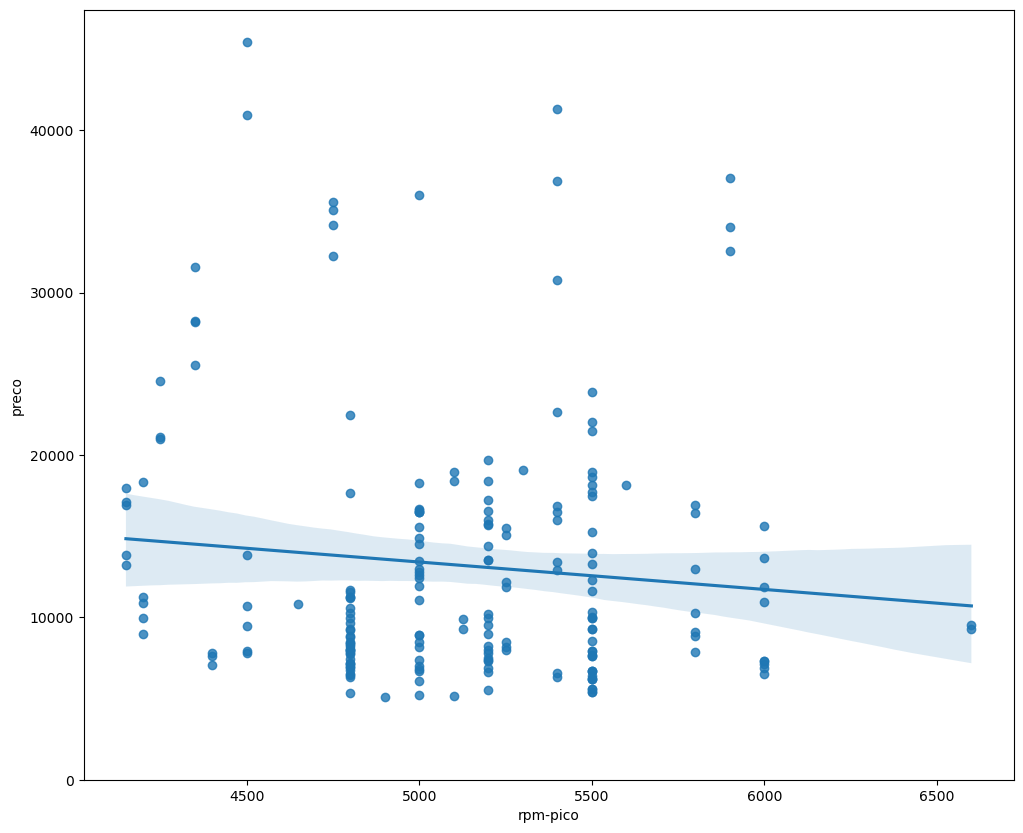

In [23]:
plt.figure(figsize=(width, height))
sns.regplot(x="rpm-pico", y="preco", data=df)
plt.ylim(0,)

Comparando o gráfico de regressão de "rotação máxima do motor" com o de "consumo de estrada", observamos que os pontos de "consumo de estrada" estão muito mais próximos da linha gerada e, em média, diminuem. Os pontos de "rotação máxima do motor" apresentam maior dispersão em torno da linha prevista, e é muito mais difícil determinar se os pontos estão diminuindo ou aumentando à medida que a "rotação máxima do motor" aumenta.

In [25]:
df[['rpm-pico', 'consumo-na-estrada', 'preco']].corr()

,rpm-pico,consumo-na-estrada,preco
rpm-pico,1.000000,-0.058598,-0.101616
consumo-na-estrada,-0.058598,1.000000,-0.704692
preco,-0.101616,-0.704692,1.000000


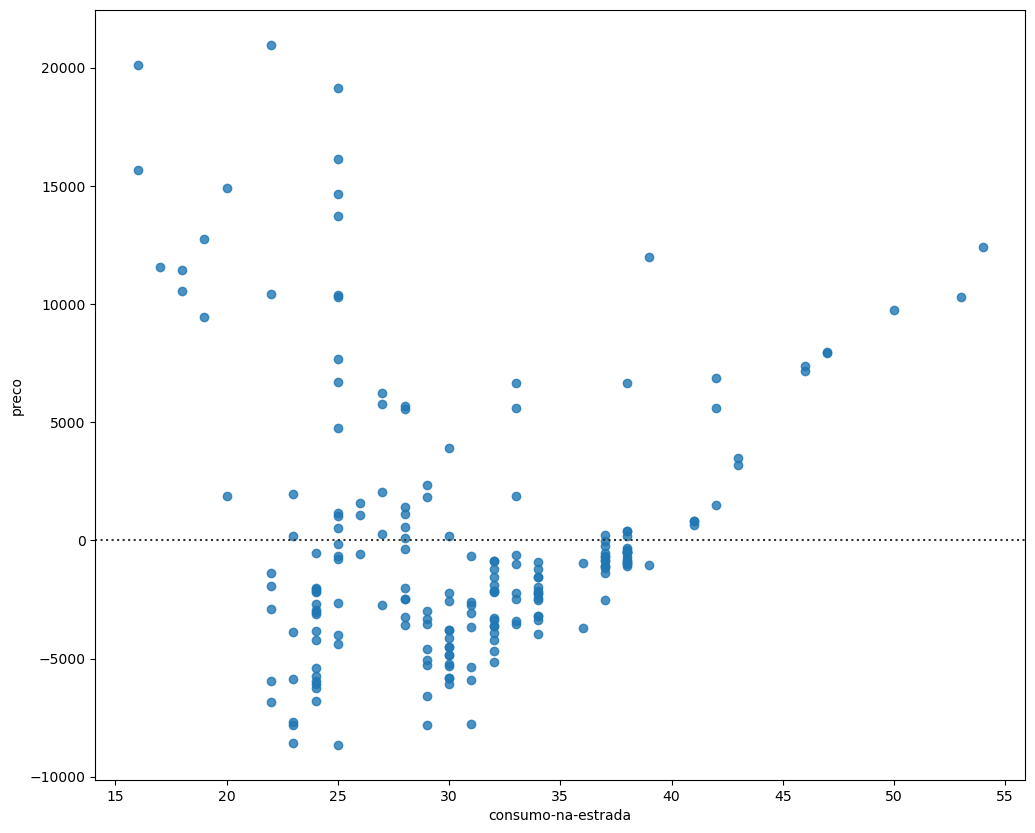

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['consumo-na-estrada'], y=df['preco'])
plt.show()

Podemos ver a partir deste gráfico que os resíduos não estão distribuídos aleatoriamente ao redor do eixo x, o que nos leva a acreditar que talvez um modelo não linear seja mais apropriado para esses dados.

In [28]:
Y_hat = lm.predict(Z)

/tmp/ipykernel_28080/3947788148.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['preco'], hist=False, color="r", label="Valor Atual")
/tmp/ipykernel_28080/3947788148.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Valores Aj

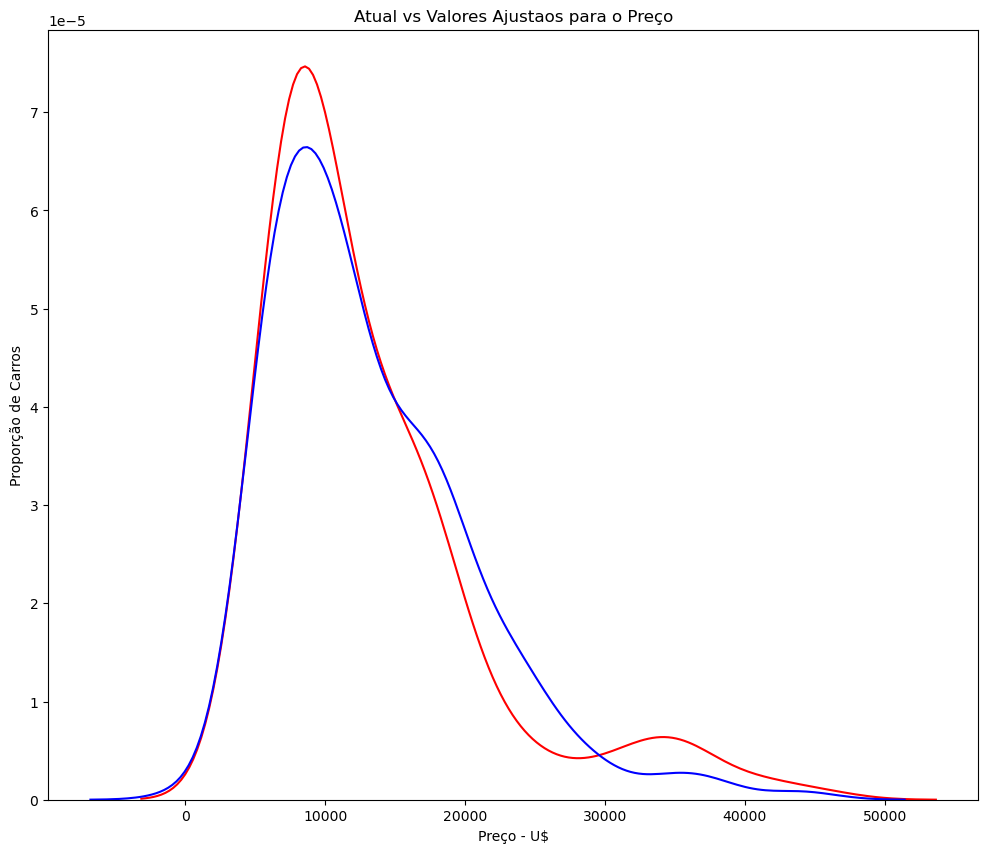

In [30]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['preco'], hist=False, color="r", label="Valor Atual")
sns.distplot(Y_hat, hist=False, color="b", label="Valores Ajustados" , ax=ax1)


plt.title('Atual vs Valores Ajustaos para o Preço')
plt.xlabel('Preço - U$')
plt.ylabel('Proporção de Carros')

plt.show()
plt.close()

<h2>3. Regressão Polinomial e Pipelines</h2>

<center><b>Quadrática - 2ª Ordem</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<center><b>Cúbica - 3ª Ordem</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$


<center><b>Ordem Superior</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\
$$


Observamos anteriormente que um modelo linear não forneceu o melhor ajuste ao usar o "consumo de estrada" como variável preditora. Vamos ver se podemos tentar ajustar um modelo polinomial aos dados em vez disso

In [34]:
# Função para plotar os dados.
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Ajuste Polinomial com Matplotlib para Preço ~ Comprimento')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Preço dos carros.')

    plt.show()
    plt.close()

In [33]:
x = df['consumo-na-estrada']
y = df['preco']

In [35]:
# Aqui usado um polinomio de terceira ordem. 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


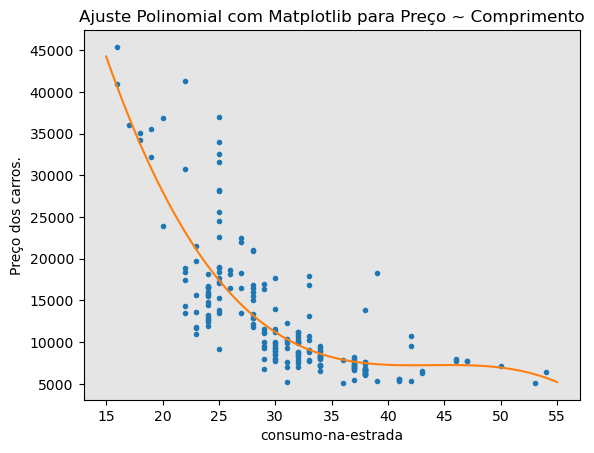

In [36]:
PlotPolly(p, x, y, 'consumo-na-estrada')

Podemos observar pelo gráfico que este modelo polinomial tem um desempenho melhor do que o modelo linear. Isso ocorre porque a função polinomial gerada "atinge" mais dos pontos de dados.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


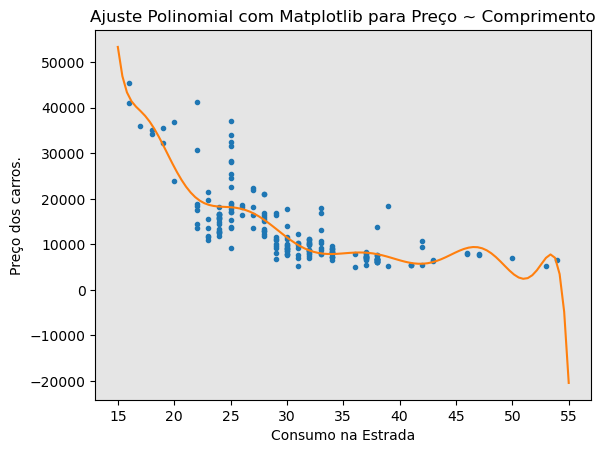

In [37]:
# Aqui utilizaremos um polinomio de décima primeira ordem. 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Consumo na Estrada')

Podemos realizar uma transformação polinomial em várias características.

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

In [40]:
Z.shape

(201, 4)


Nos dados originais, há 201 amostras e 4 características.

In [41]:
Z_pr.shape

(201, 15)

Após a transformação, há 201 amostras e 15 caracteristicas.

<h2>Pipeline</h2>
<p>Pipelines de Dados simplificam as etapas de processamento dos dados. Usamos o módulo <b>Pipeline</b> para criar um pipeline. Também utilizamos o <b>StandardScaler</b> como uma etapa em nosso pipeline.</p>

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
Input=[
    ('scale',StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model',LinearRegression())
]

In [46]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Primeiro, convertemos o tipo de dados Z para float para evitar avisos de conversão que podem surgir como resultado do StandardScaler aceitar entradas do tipo float.

Em seguida, podemos normalizar os dados, realizar uma transformação e ajustar o modelo simultaneamente.

In [47]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Da mesma forma, podemos normalizar os dados, realizar uma transformação e produzir uma previsão simultaneamente.

In [48]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Agora criaremos um pipeline que padroniza os dados e, em seguida, faz uma previsão usando um modelo de regressão linear usando as características Z e o alvo y.

In [49]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])